In this experiment, I looked at generating random datalog datasets and comparing the fetch times for different indexing schemes. There are no rules, just fact, because the tables cannot handle inference.

In [1]:
from src import *
from random import randint

def i_term(mx):
    return Term(str(randint(0, mx)))

def make_term(length, n_unique):
    return Term(
        str(randint(0, n_unique)),
        [str(randint(0, n_unique)) for _ in range(length)]
    )

def make_kb(length, n_unique, n_rows):
    d = []
    for _ in range(n_rows):
        d.append(make_term(length, n_unique))
    return d

# it works
make_kb(5, 3, 10)

[1(3, 3, 3, 0, 1),
 3(3, 2, 0, 3, 2),
 2(0, 2, 2, 0, 0),
 2(2, 0, 1, 2, 0),
 3(1, 2, 0, 1, 2),
 3(0, 1, 1, 2, 1),
 3(2, 2, 0, 1, 2),
 2(1, 1, 1, 3, 3),
 2(2, 3, 2, 1, 2),
 3(3, 2, 0, 1, 1)]

In [2]:
from functools import partial
from itertools import product
from pprint import pprint
import time
import matplotlib.pyplot as plt
import random

def predicate_table():
    return PredicateIndex(factory=LinearTable)

tbs = [LinearTable, TrieTable, predicate_table]

def experiment(runs=100, **settings):
    data = {}
    
    # make datasets
    kbs = []
    for l, u, r in product(settings['length'], settings['n_unique'], settings['n_rows']):
        kbs.append([make_kb(l, u, r), (l, u, r)])
    
    # iterate over different indexing schemes
    for tb in tbs:
        data[tb.__name__] = []
        
        # iterate over different combinations or length, n_unique, n_rows
        for kb, (l, u, r) in kbs:
        
            # create the table
            this_tb = tb()
            for thing in kb:
                this_tb.tell(thing)
            
            # run a bunch of fetches, get an average time
            t = time.time()
            for _ in range(runs):
                this_tb.fetch(make_term(l, u))
            data[tb.__name__].append((time.time() - t)/runs)
            
    return data

def plot_data(data, x, x_label):
    for name in data:
        plt.plot(x, data[name], label=name)
        
    plt.legend()
    plt.title(f"Fetch time as {x_label} Varies")
    plt.ylabel("Avg Fetch Time (s)")
    plt.xlabel(x_label)

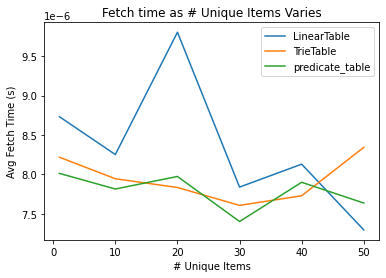

In [3]:
x = [1, 10, 20, 30, 40, 50]
data = experiment(1000, length=[5], n_unique=x, n_rows=[10000])

plot_data(data, x, "# Unique Items")

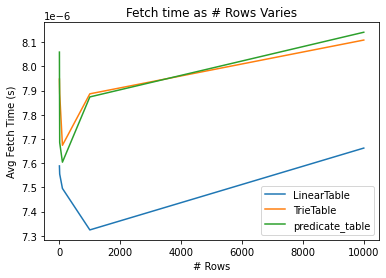

In [10]:
x = [1, 10, 100, 1000, 10000]
data = experiment(10000, length=[5], n_unique=[5], n_rows=x)

plot_data(data, x, "# Rows")

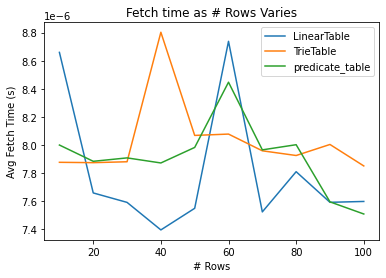

In [11]:
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data = experiment(1000, length=[5], n_unique=[5], n_rows=x)

plot_data(data, x, "# Rows")

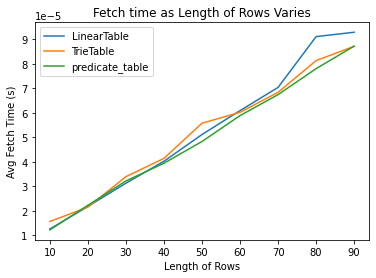

In [8]:
x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
data = experiment(1000, length=x, n_unique=[5], n_rows=[1000])

plot_data(data, x, "Length of Rows")